In [2]:
import cv2,os
import numpy as np
from tqdm import tqdm 
from matplotlib import pyplot as plt

# Read Path 

In [2]:
root = "../../Datasets/211202NDAcquisition/Cells2022/"
classes = ["NDAcquisition-01","NDAcquisition-01x40","NDAcquisition-02Nami_x20","NDAcquisition-02Nami_x40"]
path01x20 = root+classes[0]
path02Namix20 = root+classes[2]
path01x40 = root+classes[1]
path02Namix40 = root+classes[3]

In [6]:
DataPath_01x20=[]

for root,dirs,files in os.walk(path01x20):
    for file_name in files:
        path = os.path.join(root,file_name)
        label = os.path.join(file_name)
        DataPath_01x20.append(path)
        
print("len(DataPath_01x20):",len(DataPath_01x20))

############################################################

DataPath_02Namix20=[]

for root,dirs,files in os.walk(path02Namix20):
    for file_name in files:
        path = os.path.join(root,file_name)
        label = os.path.join(file_name)
        DataPath_02Namix20.append(path)
        
print("len(DataPath_02Namix20):",len(DataPath_02Namix20))

len(DataPath_01x20): 67910
len(DataPath_02Namix20): 13376


In [7]:
DataPath_01x40=[]

for root,dirs,files in os.walk(path01x40):
    for file_name in files:
        path = os.path.join(root,file_name)
        label = os.path.join(file_name)
        DataPath_01x40.append(path)
        
print("len(DataPath_01x40):",len(DataPath_01x40))

############################################################
DataPath_02Namix40=[]

for root,dirs,files in os.walk(path02Namix40):
    for file_name in files:
        path = os.path.join(root,file_name)
        label = os.path.join(file_name)
        DataPath_02Namix40.append(path)
        
print("len(DataPath_02Namix40):",len(DataPath_02Namix40))

len(DataPath_01x40): 95651
len(DataPath_02Namix40): 4387


*********

# Read Image

In [8]:
imread_01x20=[]
for i in tqdm(range(len(DataPath_01x20))):
    img = cv2.imread(DataPath_01x20[i])
    imread_01x20.append(img)
    
imread_01x20=np.array(imread_01x20)
np.save("results2022/imread_01x20.npy",imread_01x20,'dtype=object')

100%|█████████████████████████████████████████████████████| 67910/67910 [34:33<00:00, 32.75it/s]
/tmp/10289883.1.gpu/ipykernel_236256/754911371.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imread_01x20=np.array(imread_01x20)


In [9]:
imread_02Namix20=[]
for i in tqdm(range(len(DataPath_02Namix20))):
    img = cv2.imread(DataPath_02Namix20[i])
    
    imread_02Namix20.append(img)
    
imread_02Namix20=np.array(imread_02Namix20)
np.save("results2022/imread_02Namix20.npy",imread_02Namix20,'dtype=object')

100%|█████████████████████████████████████████████████████| 13376/13376 [07:25<00:00, 30.02it/s]
/tmp/10289883.1.gpu/ipykernel_236256/3642339943.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imread_02Namix20=np.array(imread_02Namix20)


In [10]:
imread_01x40=[]
for i in tqdm(range(len(DataPath_01x40))):
    img = cv2.imread(DataPath_01x40[i])
    if img.shape[0]<=100 and img.shape[1]<=100:
        imread_01x40.append(img)
    
imread_01x40=np.array(imread_01x40)
np.save("results2022/imread_01x40.npy",imread_01x40,'dtype=object')

100%|█████████████████████████████████████████████████████| 95651/95651 [58:06<00:00, 27.44it/s]
/tmp/10289883.1.gpu/ipykernel_236256/2331728426.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imread_01x40=np.array(imread_01x40)


In [11]:
imread_02Namix40=[]
for i in tqdm(range(len(DataPath_02Namix40))):
    img = cv2.imread(DataPath_02Namix40[i])
    if img.shape[0]<=100 and img.shape[1]<=100:
        imread_02Namix40.append(img)
    
imread_02Namix40=np.array(imread_02Namix40)
np.save("results2022/imread_02Namix40.npy",imread_02Namix40)

100%|███████████████████████████████████████████████████████| 4387/4387 [02:41<00:00, 27.17it/s]
/tmp/10289883.1.gpu/ipykernel_236256/1434122838.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imread_02Namix40=np.array(imread_02Namix40)


*********

# Data preprocessing

In [3]:
Data_02Nami=np.load("results2022/imread_02Namix40.npy",allow_pickle=True)
Data_01=np.load("results2022/imread_01x40.npy",allow_pickle=True)
print("Data_01.shape:", Data_01.shape)
print("Data_02Nami.shape:", Data_02Nami.shape)

Data_01.shape: (91916,)
Data_02Nami.shape: (4056,)


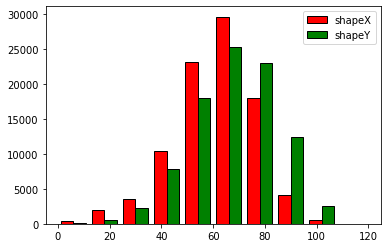

In [7]:
shapeX=[]
shapeY=[]
for i in range(len(Data_01)):
    shapeX.append(Data_01[i].shape[0])
    shapeY.append(Data_01[i].shape[1])    
fig, ax = plt.subplots()
ax.hist([shapeX,shapeY], label=["shapeX", "shapeY"], color=["r", "g"], ec="k",range=[0,120])
ax.legend()

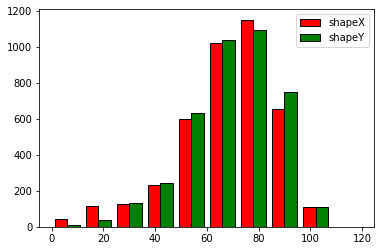

In [8]:
shapeX=[]
shapeY=[]
for i in range(len(Data_02Nami)):
    shapeX.append(Data_02Nami[i].shape[0])
    shapeY.append(Data_02Nami[i].shape[1])    
fig, ax = plt.subplots()
ax.hist([shapeX,shapeY], label=["shapeX", "shapeY"], color=["r", "g"], ec="k",range=[0,120])
ax.legend()

## padding 

In [4]:
#　同じサイズにする
Max_shape_0=100
Max_shape_1=100
def datapadding(img):
    imgSize = img.shape
    top_size,bottom_size = (Max_shape_0-imgSize[0])//2,(Max_shape_0-imgSize[0])//2
    left_size,right_size = (Max_shape_1-imgSize[1])//2,(Max_shape_1-imgSize[1])//2
    if (imgSize[0] % 2) != 0:
        top_size,bottom_size = (Max_shape_0-imgSize[0])//2,(Max_shape_0-imgSize[0])//2+1
    if (imgSize[1] % 2) != 0:     
        left_size,right_size = (Max_shape_1-imgSize[1])//2,(Max_shape_1-imgSize[1])//2+1
    img_pad = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_CONSTANT,value=(0,0,0))
    return img_pad

In [5]:
num=0
final_01=[]
for n in range(len(Data_01)):
    img = Data_01[n]
    if 50<=img.shape[0]<=100 and 50<=img.shape[1]<=100:
        num+=1
        final_01.append(datapadding(img))
final_01=np.array(final_01)
np.save("results2022/01x40_padded.npy",final_01)
print(final_01.shape)


num=0
final_02=[]
for n in range(len(Data_02Nami)):
    img = Data_02Nami[n]
    if 50<=img.shape[0]<=100 and 50<=img.shape[1]<=100:
        num+=1
        final_02.append(datapadding(img))
final_02=np.array(final_02)
np.save("results2022/02x40_padded.npy",final_02)
print(final_02.shape)

(3219, 100, 100, 3)


# split train and test

In [4]:
Data_01=np.load("results2022/01x40_padded.npy",allow_pickle=True)
Data_02Nami=np.load("results2022/02x40_padded.npy",allow_pickle=True)

print("Data_01.shape:", Data_01.shape)
print("Data_02Nami.shape:", Data_02Nami.shape)

Data_01.shape: (65969, 100, 100, 3)
Data_02Nami.shape: (3219, 100, 100, 3)


In [8]:
# train
untreaded_train=Data_01[:3000]
untreaded_train_all=Data_01[:65000]
VPAtreaded_train=Data_02Nami[:3000]
# test
untreaded_test=Data_01[-210:]
VPAtreaded_test=Data_02Nami[-210:]

print("untreaded_train.shape:", untreaded_train.shape)
print("VPAtreaded_train.shape:", VPAtreaded_train.shape)
print("untreaded_train_all.shape:", untreaded_train_all.shape)
print("untreaded_test.shape:", untreaded_test.shape)
print("VPAtreaded_test.shape:", VPAtreaded_test.shape)

untreaded_train.shape: (3000, 100, 100, 3)
VPAtreaded_train.shape: (3000, 100, 100, 3)
untreaded_train_all.shape: (65000, 100, 100, 3)
untreaded_test.shape: (210, 100, 100, 3)
VPAtreaded_test.shape: (210, 100, 100, 3)


In [ ]:
np.save("results2022/untreaded_train.npy",untreaded_train)
np.save("results2022/VPAtreaded_train.npy",VPAtreaded_train)

np.save("results2022/untreaded_train_all.npy",untreaded_train_all)

np.save("results2022/untreaded_test.npy",untreaded_test)
np.save("results2022/VPAtreaded_test.npy",VPAtreaded_test)